# Decision Tree

Objective(s):

This activity aims to perform classification using Decision Tree

Intended Learning Outcomes (ILOs):
* Demonstrate how to build the model using Decision Tree.
* Demonstrate how to evaluate the performance of the model.
* Demonstrate how to create tree visualization of the model.

Resources:
* Jupyter Notebook
* kyphosis 

Procedure:

Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [5]:
filepath = '/content/drive/My Drive/Colab Notebooks/Datasets/kyphosis-2.csv'

Load the data and check the content of the dataframe using Pandas

In [6]:
df = pd.read_csv(filepath)
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
# Select only the numeric columns
numeric_cols = ['Age', 'Number', 'Start']
numeric_df = df[numeric_cols]

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)

             Age    Number     Start
Age     1.000000 -0.016687  0.057828
Number -0.016687  1.000000 -0.425099
Start   0.057828 -0.425099  1.000000


Check the pairplot of the data

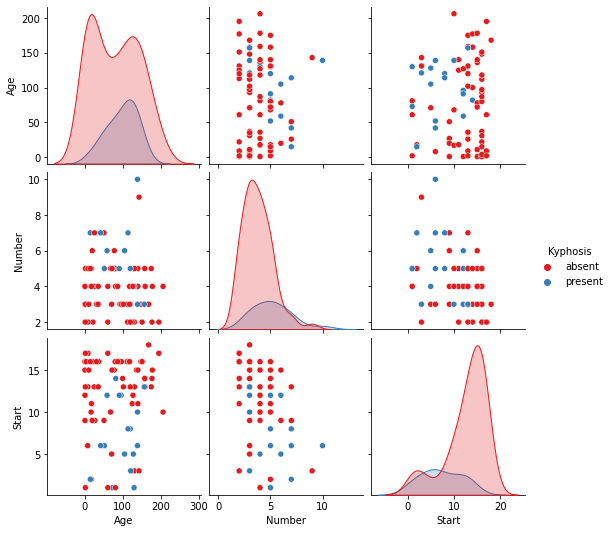

In [7]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

Interpret the result of the pairplot

- The scatter plots show the relationship between pairs of numeric variables in the dataset. 

    - Age vs Number- as the age of the patient increases, the number of vertebrae involved in the surgery tends to slightly decrease, although the relationship is not very strong.
    - Age vs Start- there is a very slight tendency for patients who are older at the time of the surgery to have a higher starting vertebra level, but the relationship is not significant.
    - Number vs Start- as the number of vertebrae involved in the surgery increases, the starting vertebra level tends to decrease. This is a more significant relationship.

- The histograms show the distribution of each numeric variable in the dataset.
- The histogram of "Age" shows that the ages of the patients in the dataset are roughly normally distributed.

Build the model using Decision Tree

Split the data into training and test set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Train a single decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Determine how many nodes are present and what the depth of this (very large) tree is.

The number of nodes and the maximum actual depth.

In [15]:
dtree.tree_.node_count, dtree.tree_.max_depth

(25, 5)

Predict and evaluate the model

In [16]:
predictions = dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
#evaluate the performance using classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        21
     present       0.33      0.25      0.29         4

    accuracy                           0.80        25
   macro avg       0.60      0.58      0.58        25
weighted avg       0.78      0.80      0.79        25



Interpret the precision, recall and f1-score

Precision: Precision is a measure of the model's ability to correctly identify positive instances (in this case "present") among all instances that the model predicted as positive. In this report, the precision for the "absent" class is 0.86, which means that 86% of the instances predicted as "absent" by the model were actually "absent". The precision for the "present" class is 0.33, which means that only 33% of the instances predicted as "present" by the model were actually "present".

Recall: Recall is a measure of the model's ability to correctly identify positive instances among all instances that are actually positive. In this report, the recall for the "absent" class is 0.90, which means that 90% of the instances that are actually "absent" were correctly identified by the model. The recall for the "present" class is 0.25, which means that only 25% of the instances that are actually "present" were correctly identified by the model.

F1-score: F1-score is the harmonic mean of precision and recall, and it provides a balance between these two metrics. In this report, the f1-score for the "absent" class is 0.88, which indicates a good balance between precision and recall. The f1-score for the "present" class is 0.29, which is relatively low due to the low recall for this class.

In summary, this model has a high precision and recall for the "absent" class, but a low recall and f1-score for the "present" class. This suggests that the model is better at predicting the "absent" class than the "present" class.

In [19]:
#evaluate the performance using confusion matrix
print(confusion_matrix(y_test,predictions))

[[19  2]
 [ 3  1]]


Interpret the performance using classification matrix

- This means that the model correctly predicted 19 instances of the "absent" class as absent and 2 instances of the "absent" class as present.
- And, the bottom part, this means that the model incorrectly predicted 3 instances of the "present" class as absent and predicted only 1 instance of the "present" class as present correctly.

In [20]:
#evaluate the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.8


Interpret the performance of the model using accuracy score

- An accuracy score of 0.8 means that the model correctly predicted the class labels for 80% of the instances in the test set. 

In [24]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Create a tree visualization of the model

In [25]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

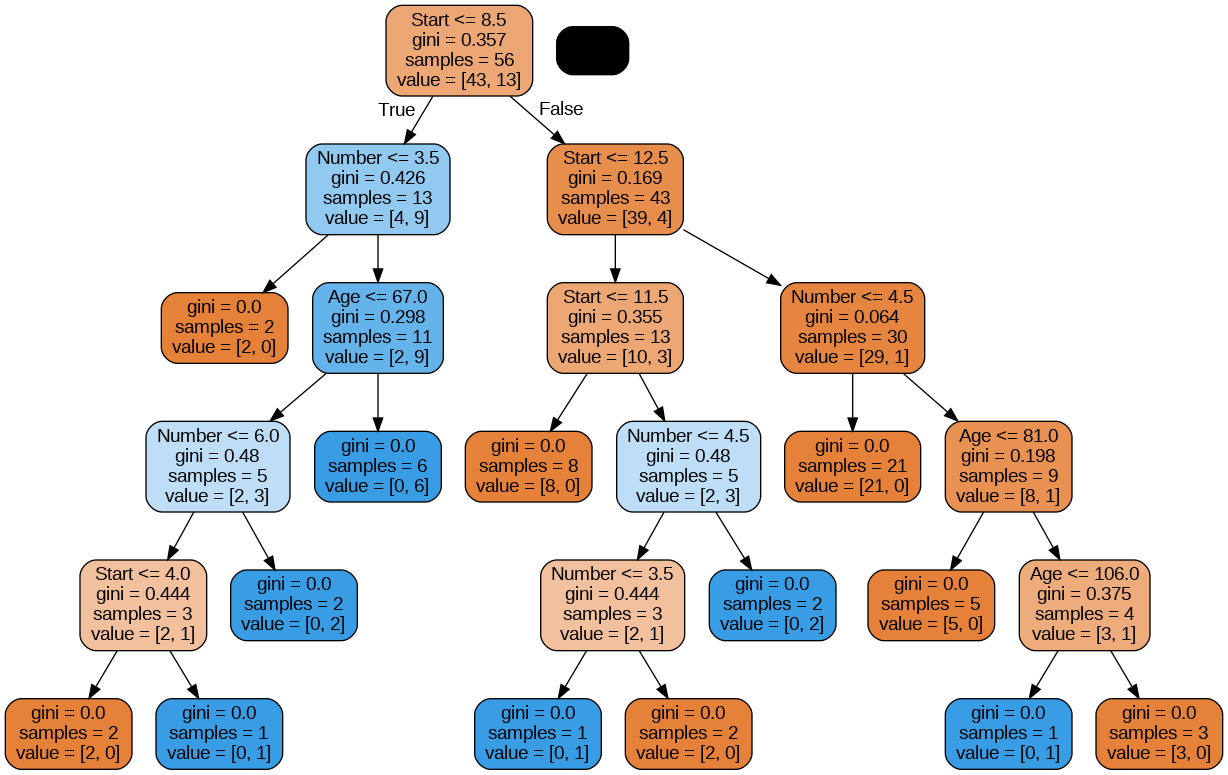

In [26]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
filename = 'kyphosis .png'
graph.write_png(filename)
img = Image(filename=filename)
display(img)

# **Supplementary Activity:**
* Choose your own dataset 
* Import the dataset 
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization 
* Build the model using Decision Tree
* Evaluate the model using classification report, accuracy and confusion matrix
* Create a tree visualization of the model

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [28]:
fp= '/content/drive/My Drive/Colab Notebooks/Datasets/Iris_Data.csv'

In [30]:
df= pd.read_csv(fp)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
# number of datapoints and columns in the DataFrame
print("Number of datapoints: {}".format(len(df)))
print("Number of columns: {}".format(len(df.columns)))

# Print the data types of each column
print("\nData types:")
print(df.dtypes)


Number of datapoints: 150
Number of columns: 5

Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [31]:
# Select only the numeric columns
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
numeric_df = df[numeric_cols]

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


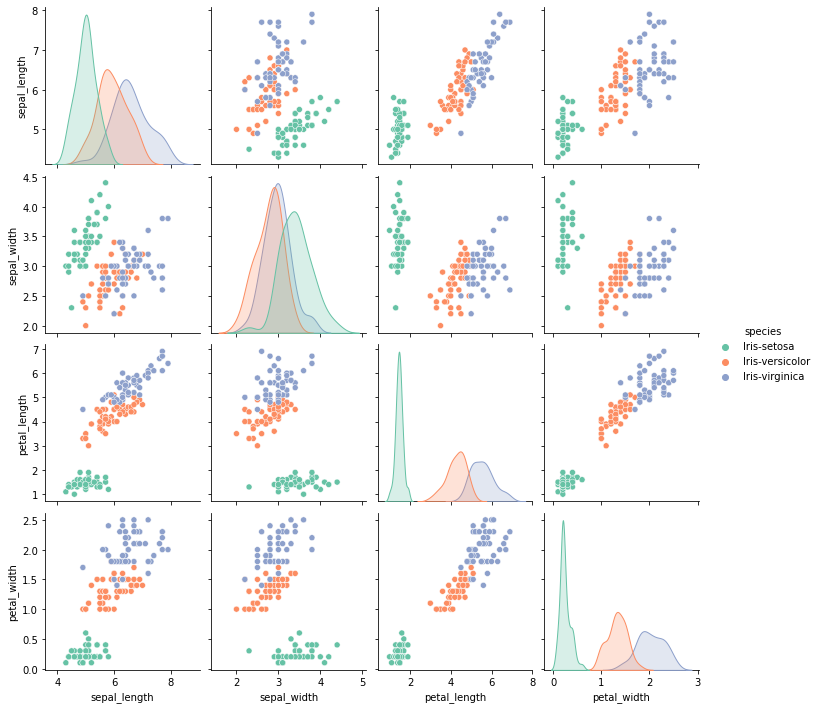

In [36]:
sns.pairplot(df,hue='species',palette='Set2')

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop('species',axis=1)
y = df['species']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
#The number of nodes and the maximum actual depth.
dtree.tree_.node_count, dtree.tree_.max_depth

(11, 4)

In [46]:
predictions = dtree.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [48]:
#evaluate the performance using classification report
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      0.79      0.86        19
 Iris-virginica       0.78      0.93      0.85        15

       accuracy                           0.89        45
      macro avg       0.91      0.91      0.90        45
   weighted avg       0.90      0.89      0.89        45



In [49]:
#evaluate the performance using confusion matrix
print(confusion_matrix(y_test,predictions))

[[11  0  0]
 [ 0 15  4]
 [ 0  1 14]]


In [50]:
#evaluate the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.8888888888888888


In [53]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[:4])
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

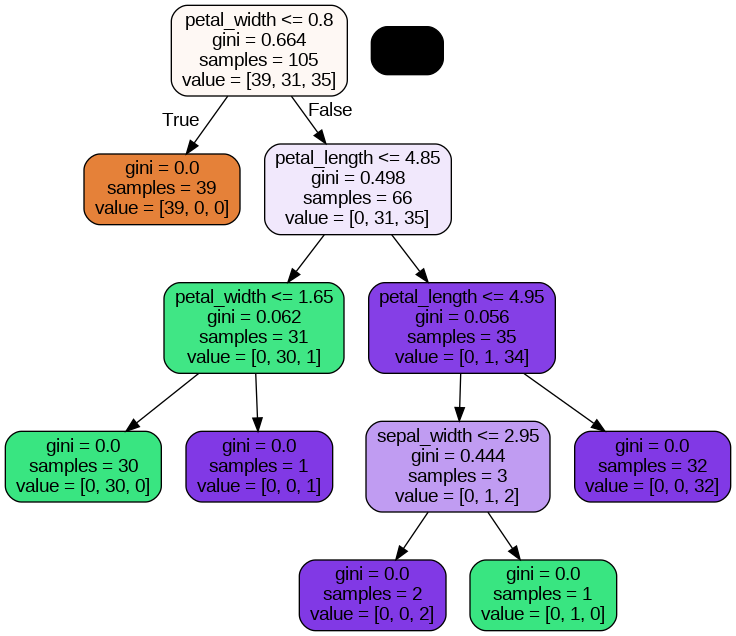

In [54]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
filename = 'species .png'
graph.write_png(filename)
img = Image(filename=filename)
display(img)

Conclusion

Based on the classification report, accuracy and confusion matrix, we can conclude that the model has performed reasonably well. The overall accuracy of the model is 0.89, which means that the model correctly classified 89% of the samples in the test set. The precision, recall, and F1-score for each class are also good, with an F1-score of 1.00 for Iris-setosa, and 0.86 and 0.85 for Iris-versicolor and Iris-virginica respectively.

However, looking at the confusion matrix, we can see that the model has some difficulty in distinguishing between Iris-versicolor and Iris-virginica, with 4 samples of Iris-versicolor being misclassified as Iris-virginica, and 1 sample of Iris-virginica being misclassified as Iris-versicolor. Overall, the model seems to be good at classifying Iris-setosa but struggles a bit with the other two classes.